In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Fuzzy Membership function
Define a function to compute our fuzzy membership functions

In [2]:
def triangular_fuzzy_mf(x,a,m,b):
    if x < a or x > b:
        return 0
    elif x >= a and x <= m :
        return (x - a) / (m - a)
    else : 
        return (x - b) / (m - b)

In [3]:
phi_mf = [(-115, -15), (-45, 45), (15, 90), (80, 100), (90, 165), (135, 225), (195, 295)]
x_mf = [(-4, 7), (4, 10), (9, 11), (10, 16), (13, 24)]
theta_mf = [(-60, -20), (-33, -7), (-14, 0), (-4, 4), (0, 14), (7, 33), (20, 60)]

# Calculate fire level

In [4]:
def phi_fire(x, rule) :
    return triangular_fuzzy_mf(x, phi_mf[rule][0], (phi_mf[rule][0] + phi_mf[rule][1]) / 2, phi_mf[rule][1])

def x_fire(x, rule) :
    if rule == 0 and x <= 1.5 and x >= 0 :
        return 1
    elif rule == 5 and x >= 18.5 and x <= 20 :
        return 1
    else:
        return triangular_fuzzy_mf(x, x_mf[rule][0], (x_mf[rule][0] + x_mf[rule][1]) / 2, x_mf[rule][1])

def theta_fire(x, rule) :
    return triangular_fuzzy_mf(x, theta_mf[rule][0], (theta_mf[rule][0] + theta_mf[rule][1]) / 2, theta_mf[rule][1])

## Calculate next x and next phi based on given formula

In [5]:
def next_x(x, phi, theta) :
    return x + math.cos(math.radians(phi + theta)) + math.sin(math.radians(phi)) * math.sin(math.radians(theta))

def next_phi(phi, theta, b = 4):
    return phi - math.degrees(math.asin(2 * math.sin(math.radians(theta)) / b))

## calculate input dataset

In [6]:
input = []

start_point = []
start_point.append((1.0 , 0.0))
start_point.append((1.0 , 90.0))
start_point.append((1.0 , -90.0))

start_point.append((7.0 , 0.0))
start_point.append((7.0 , 90.0))
start_point.append((7.0 , 180.0))

start_point.append((7.0 , -90.0))
start_point.append((13.0 , 0.0))
start_point.append((13.0 , 90.0))

start_point.append((13.0 , 180.0))
start_point.append((13.0 , 270.0))
start_point.append((19.0 , 90.0))

start_point.append((19.0 , 180.0))
start_point.append((19.0 , 270.0))


input_theta = []
input_theta.append([-19.0, -17.95, -16.90, -15.85, -14.80, -13.75, -12.70, -11.69, -10.69, -9.55, -8.50, -7.45, -6.40, -5.34, -4.30, -3.25, -2.20, 0.0])
input_theta.append([18.00, 16.00, 14.00, 12.00, 10.00, 8.00, 6.00, 4.00, 2.00, 0.00, -2.00, -4.00, -6.00, -8.00, -10.00, -12.00, -14.00, -16.00, -18.00, 0.00])
input_theta.append([-30.0, -29.0, -28.0, -27.0, -26.0, -25.0, -24.0, -23.0, -22.0, -21.0, -20.0, -19.0, -18.0, -17.0, -16.0, -15.0, -14.0, 0.0])

input_theta.append([-40.0, -38.5, -37.0, -35.5, -34.0, -3.0, 0.0])
input_theta.append([12.00, 10.06, 8.12, 6.18, 4.24, 2.30, 0.34, -1.58, -3.52, -5.46, -7.40, -9.34, -11.28, 0.00])
input_theta.append([40.0, 36.80, 33.60, 30.40, 27.20, 24.00, 20.80, 16.60, 14.40, 11.20, 8.00, 4.80, 1.60, -1.60, -4.80, -11.20, -14.40, -17.60, -20.80, -24.00, 0.0])

input_theta.append([-40.0, -39.0, -38.0, -37.0, -36.0, -35.0, -34.0, -33.0, -32.0, -31.0, -30.0, -29.0, -28.0, 0.0, 15.0, 13.0, 11.0, 9.0, 7.0, 5.0, 0.0])
input_theta.append([-40.0, -36.80, -33.60, -30.40, -27.20, -24.00, -20.80, -17.60, -14.40, -11.20, -8.00, -4.80, -1.60, 1.60, 4.80, 8.00, 11.20, 14.40, 17.60, 20.80, 0.0])
input_theta.append([-12.00, -10.05, -8.10, -6.15, -4.20, -2.25, -0.30, 1.65, 3.60, 5.55, 7.50, 9.45, 11.40, 0.00])

input_theta.append([40.00, 38.05, 37.00, 35.50, 34.00, 5.50, 0.00])
input_theta.append([40.00, 39.00, 38.00, 37.00, 36.00, 35.00, 34.00, 33.00, 32.00, 31.00, 30.00, 29.00, 28.00, 0.00, -15.00, -13.00, -10.00, -8.00, -5.50, -3.50, 0.00])
input_theta.append([-18.00, -16.00, -14.00, -12.00, -10.00, -8.00, -6.00, -4.00, -2.00, 0.00, 2.00, 4.00, 6.00, 8.00, 10.00, 12.00, 14.00, 16.00, 18.00, 0.00])

input_theta.append([19.00, 17.95, 16.90, 15.85, 14.80, 13.75, 12.70, 11.65, 10.60, 9.55, 8.50, 7.45, 6.40, 5.45, 4.50, 3.55, 2.50, 0.00])
input_theta.append([30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.2, 15.4, 14.6, 13.8])

In [7]:
for i in range(len(start_point)):
    t = start_point[i]
    input.append([])
    for j in input_theta[i]:
        input[i].append((t[0], t[1], j))
        t = (next_x(t[0], t[1], j), next_phi(t[1], j))

In [9]:
for i in input:
    for j in i:
        print(j)
    print("------------------------")

(1.0, 0.0, -19.0)
(1.945518575599317, 9.368531126713687, -17.95)
(2.884155345077659, 18.232754927432204, -16.9)
(3.792930515084024, 26.590365877694893, -15.85)
(4.653161438539353, 34.439197972112446, -14.8)
(5.450526590509318, 41.77722391347689, -13.75)
(6.174896099112391, 48.602554342452954, -12.7)
(6.819996044354198, 54.91343710985116, -11.69)
(7.3828867363801916, 60.72794411828767, -10.69)
(7.863358048281564, 66.04963600971433, -9.55)
(8.263677209900493, 70.80802502696287, -8.5)
(8.588800717840266, 75.04631692114712, -7.45)
(8.844660583319028, 78.76343628746093, -6.4)
(9.038306513275776, 81.95844155058415, -5.34)
(9.177590717676681, 84.62554090981902, -4.3)
(9.270991573958211, 86.77402667631168, -3.25)
(9.327175179071608, 88.39837298589013, -2.2)
(9.355104601961338, 89.4981702443209, 0.0)
------------------------
(1.0, 90.0, 18.0)
(1.0, 81.11170817707703, 16.0)
(1.1485231000433118, 73.19006604208832, 14.0)
(1.4291304631517754, 66.24250120334139, 12.0)
(1.8231933451319562, 60.2754895

# Step 2 : Find rules and their level

In [10]:
def rule_set_calc(input):
    rule_set = []
    rules_fire_level = []

    for i in input:
        for j in i :
            max_ = 0
            rule1 = 0
            for t in range(len(x_mf)):
                tmp = x_fire(j[0], t)
                if tmp > max_:
                    rule1 = t
                    max_ = tmp
            

            max_ = 0
            rule2 = 0
            for t in range(len(phi_mf)):
                tmp = phi_fire(j[1], t)
                if tmp > max_:
                    rule2 = t
                    max_ = tmp

            max_ = 0
            rule3 = 0
            for t in range(len(theta_mf)):
                tmp = theta_fire(j[2], t)
                if tmp > max_:
                    rule3 = t
                    max_ = tmp
            
            rule_set.append((rule1, rule2, rule3))
            rules_fire_level.append(x_fire(j[0], rule1) * phi_fire(j[1], rule2) * theta_fire(j[2], rule3))

    return rule_set, rules_fire_level

In [11]:
rule_set, rules_fire_level = rule_set_calc(input)

In [12]:
def print_rules():
    for i in range(len(rule_set)):
        n1 = abs(rule_set[i][0] - int(len(x_mf) / 2))
        rule1 = ("CE" if n1 == 0 else (("B" if rule_set[i][0] > len(x_mf) / 2 else "S") + str(n1)))

        n2 = abs(rule_set[i][1] - int(len(phi_mf) / 2))
        rule2 = ("CE" if n2 == 0 else (("B" if rule_set[i][1] > len(phi_mf) / 2 else "S") + str(n2)))

        n3 = abs(rule_set[i][2] - int(len(theta_mf) / 2))
        rule3 = ("CE" if n3 == 0 else (("B" if rule_set[i][2] > len(theta_mf) / 2 else "S") + str(n3)))
        print("If x is %s and phi is %s then theta is %s whith D : %f" % (rule1, rule2, rule3, rules_fire_level[i]))

In [13]:
print_rules()

If x is S2 and phi is S2 then theta is S2 whith D : 0.923077
If x is S2 and phi is S2 then theta is S2 whith D : 0.612923
If x is S2 and phi is S2 then theta is S2 whith D : 0.338984
If x is S2 and phi is S2 then theta is S2 whith D : 0.162397
If x is S2 and phi is S1 then theta is S2 whith D : 0.132715
If x is S1 and phi is S1 then theta is S2 whith D : 0.179267
If x is S1 and phi is S1 then theta is S2 whith D : 0.284833
If x is S1 and phi is S1 then theta is S2 whith D : 0.317297
If x is S1 and phi is S1 then theta is S1 whith D : 0.321998
If x is S1 and phi is S1 then theta is S1 whith D : 0.289170
If x is S1 and phi is S1 then theta is S1 whith D : 0.232735
If x is S1 and phi is S1 then theta is S1 whith D : 0.175520
If x is S1 and phi is S1 then theta is S1 whith D : 0.105505
If x is S1 and phi is S1 then theta is S1 whith D : 0.052441
If x is S1 and phi is CE then theta is S1 whith D : 0.077893
If x is CE and phi is CE then theta is S1 whith D : 0.085229
If x is CE and phi is CE

# Step 3 : Prune rules

In [14]:
def distinct_rules_calc(rule_set, rules_fire_level): 
    distinct_rules = {}
    for i in range(len(rule_set)):
        rule = (rule_set[i][0], rule_set[i][1])
        result = (rule_set[i][2], rules_fire_level[i])
        
        if rule in distinct_rules:
            if result[1] > distinct_rules[rule][1]:
                distinct_rules[rule] = result
        else:
            distinct_rules[rule] = result
    return distinct_rules

In [15]:
distinct_rules = distinct_rules_calc(rule_set, rules_fire_level)

In [16]:
def print_distinct_rules():
    for i in distinct_rules.keys():
        n1 = abs(i[0] - int(len(x_mf) / 2))
        rule1 = ("CE" if n1 == 0 else (("B" if i[0] > len(x_mf) / 2 else "S") + str(n1)))

        n2 = abs(i[1] - int(len(phi_mf) / 2))
        rule2 = ("CE" if n2 == 0 else (("B" if i[1] > len(phi_mf) / 2 else "S") + str(n2)))

        n3 = abs(distinct_rules[i][0] - int(len(theta_mf) / 2))
        rule3 = ("CE" if n3 == 0 else (("B" if distinct_rules[i][0] > len(theta_mf) / 2 else "S") + str(n3)))
        print("If x is %s and phi is %s then theta is %s whith D : %f" % (rule1, rule2, rule3, distinct_rules[i][1]))

In [17]:
print_distinct_rules()

If x is S2 and phi is S2 then theta is S2 whith D : 0.923077
If x is S2 and phi is S1 then theta is B1 whith D : 0.676225
If x is S1 and phi is S1 then theta is S1 whith D : 0.747658
If x is S1 and phi is CE then theta is B2 whith D : 0.384615
If x is CE and phi is CE then theta is CE whith D : 0.936749
If x is S2 and phi is CE then theta is B2 whith D : 0.846154
If x is CE and phi is S1 then theta is S2 whith D : 0.306854
If x is S2 and phi is S3 then theta is S3 whith D : 0.371952
If x is S1 and phi is S2 then theta is S3 whith D : 1.000000
If x is S1 and phi is B2 then theta is B3 whith D : 1.000000
If x is S1 and phi is B1 then theta is B3 whith D : 0.262025
If x is S2 and phi is B1 then theta is B3 whith D : 0.206235
If x is S1 and phi is S3 then theta is S3 whith D : 0.831198
If x is CE and phi is S2 then theta is S3 whith D : 0.433332
If x is B1 and phi is S1 then theta is S3 whith D : 0.262025
If x is B1 and phi is CE then theta is S2 whith D : 0.384615
If x is B1 and phi is B1

# Step 4 : Inference

In [18]:
def inference(x, phi):
    y = 0.
    denominator = 0.0
    
    for i in distinct_rules.keys():
        m = x_fire(x, i[0]) * phi_fire(phi, i[1])
        y += m * (theta_mf[distinct_rules[i][0]][0] + theta_mf[distinct_rules[i][0]][1]) / 2
        denominator += m
    if denominator == 0 :
        return y
    return y / denominator

In [19]:
def move(x, phi):
    target = (10.0, 90.0)
    start_position = (x, phi)
    current_position = start_position
    move = []
    while(abs(target[0] - current_position[0]) > 2 or abs(target[1] - current_position[1]) > 8):
        move.append((current_position[0], current_position[1], inference(current_position[0], current_position[1])))
        current_position = (next_x(move[-1][0], move[-1][1], move[-1][2]), next_phi(move[-1][1], move[-1][2]))
        # print("%f, %f" % (current_position[0], current_position[1]))

        if len(move) > 100:
            break
    move.append((current_position[0], current_position[1], inference(current_position[0], current_position[1])))
    return move

# Test on new data

## Plot

In [20]:
def plot_move(move):
    for i in range(len(move)):
        print("%f, %f" % (move[i][0], move[i][1]))
        degree = move[i][1] + 90
        start_y = i * 2
        line_len = 4

        pos_x = [move[i][0], move[i][0] + line_len * math.cos(math.radians(degree))]
        pos_y = [start_y, start_y + line_len * math.sin(math.radians(degree))]

        plt.plot(pos_x, pos_y, "b")
        plt.plot(pos_x[0], pos_y[0], "xb")
    plt.xlim(-3, 23)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

3.000000, -30.000000
3.753946, -15.758360
4.655671, -5.694519
5.544016, 7.324578
6.373887, 23.217016
7.189535, 36.536661
7.965120, 44.040709
8.677171, 47.973398
9.341656, 51.466862
9.943633, 58.861269
10.430338, 68.586719
10.763807, 80.331504
10.911962, 93.951376


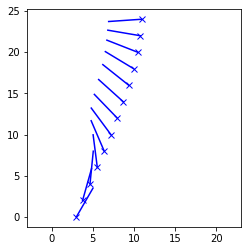

In [21]:
start_position = (3.0, -30.0)
plot_move(move(start_position[0], start_position[1]))

5.000000, -20.000000
5.804145, -5.007525
6.623258, 11.525146
7.389585, 29.679551
8.193125, 40.640144
8.937756, 46.161945
9.625216, 49.655409
10.241487, 58.464254
10.726710, 69.221388
11.035787, 83.428864


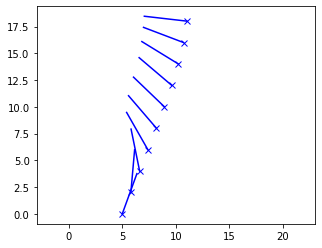

In [22]:
start_position = (5, -20)
plot_move(move(start_position[0], start_position[1]))

5.000000, 30.000000
5.842892, 36.591700
6.630671, 42.134701
7.363828, 46.441739
8.047783, 49.935202
8.686639, 53.428666
9.278021, 56.922130
9.807661, 63.854156
10.224201, 73.243738
10.491964, 83.924587


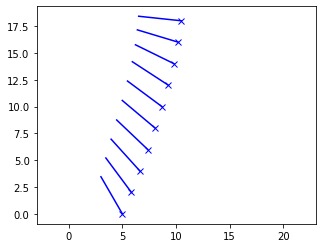

In [23]:
start_position = (5, 30)
plot_move(move(start_position[0], start_position[1]))

# Use just the first 3 row of each input dataset

In [24]:
input2 = []
for i in input:
    input2.append(i[:3])

In [25]:
rule_set, rules_fire_level = rule_set_calc(input2)

In [26]:
print_rules()

If x is S2 and phi is S2 then theta is S2 whith D : 0.923077
If x is S2 and phi is S2 then theta is S2 whith D : 0.612923
If x is S2 and phi is S2 then theta is S2 whith D : 0.338984
If x is S2 and phi is CE then theta is B2 whith D : 0.846154
If x is S2 and phi is S1 then theta is B2 whith D : 0.164092
If x is S2 and phi is S1 then theta is B2 whith D : 0.241373
If x is S2 and phi is S3 then theta is S3 whith D : 0.250000
If x is S2 and phi is S3 then theta is S3 whith D : 0.355298
If x is S2 and phi is S3 then theta is S3 whith D : 0.371952
If x is S1 and phi is S2 then theta is S3 whith D : 1.000000
If x is S1 and phi is S2 then theta is S3 whith D : 0.401844
If x is S1 and phi is S1 then theta is S3 whith D : 0.246820
If x is S1 and phi is CE then theta is B2 whith D : 0.384615
If x is S1 and phi is CE then theta is B1 whith D : 0.227000
If x is S1 and phi is S1 then theta is B1 whith D : 0.237508
If x is S1 and phi is B2 then theta is B3 whith D : 1.000000
If x is S1 and phi is B2

In [27]:
distinct_rules = distinct_rules_calc(rule_set, rules_fire_level)

In [28]:
print_distinct_rules()

If x is S2 and phi is S2 then theta is S2 whith D : 0.923077
If x is S2 and phi is CE then theta is B2 whith D : 0.846154
If x is S2 and phi is S1 then theta is B2 whith D : 0.241373
If x is S2 and phi is S3 then theta is S3 whith D : 0.371952
If x is S1 and phi is S2 then theta is S3 whith D : 1.000000
If x is S1 and phi is S1 then theta is S3 whith D : 0.246820
If x is S1 and phi is CE then theta is B2 whith D : 0.384615
If x is S1 and phi is B2 then theta is B3 whith D : 1.000000
If x is S1 and phi is B1 then theta is B3 whith D : 0.188882
If x is S1 and phi is S3 then theta is S3 whith D : 0.831198
If x is B1 and phi is S2 then theta is S3 whith D : 1.000000
If x is B1 and phi is S1 then theta is S3 whith D : 0.188882
If x is B1 and phi is CE then theta is S2 whith D : 0.384615
If x is B1 and phi is B1 then theta is B3 whith D : 0.243969
If x is B1 and phi is B2 then theta is B3 whith D : 1.000000
If x is B1 and phi is B3 then theta is B3 whith D : 0.831198
If x is B2 and phi is CE

## Test again on train data

3.000000, -30.000000
3.753946, -15.758360
4.655671, -5.694519
5.544016, 7.324578
6.373887, 23.217016
7.118170, 40.273000
7.702641, 59.020237
8.096952, 77.767474
8.259261, 96.514711


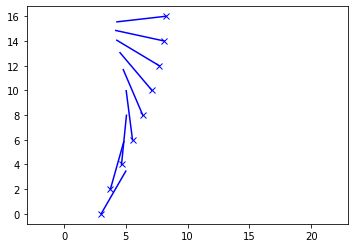

In [29]:
start_position = (3.0, -30.0)
plot_move(move(start_position[0], start_position[1]))

5.000000, -20.000000
5.804145, -5.007525
6.623258, 11.525146
7.389585, 29.679551
8.055131, 48.426788
8.563460, 67.174025
8.860634, 85.921263


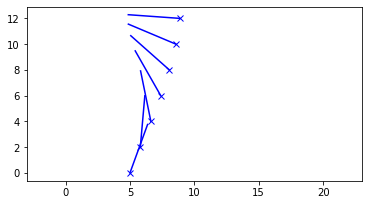

In [30]:
start_position = (5, -20)
plot_move(move(start_position[0], start_position[1]))

5.000000, 30.000000
5.822786, 38.975768
6.520482, 51.716997
7.031928, 68.107868
7.317555, 86.855105
7.370910, 80.171769
7.508461, 97.393689
7.395491, 83.539573
7.508006, 83.360924
7.623612, 83.711540
7.733117, 83.047769
7.854025, 84.394048
7.951373, 82.011644
8.087856, 87.416670


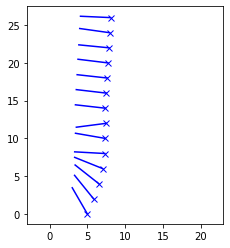

In [31]:
start_position = (5, 30)
plot_move(move(start_position[0], start_position[1]))

# Conclusion
With all samples of the dataset, the vehicle was able to park itself accuratly. However, after removing some points from dataset and using just first 3 of each table, the vehicle is still able to park itself but less accurate.

For example, in the third test, when we using all training dataset we were able to park the vehicle in 10 step, but when we use just 3 trainig sample from each table, we need to take 14 step to park the vehicle in the third test.

This is because, most of the rules have a great certainty and their aggregate count has not much different compared to when we used all samples of the dataset.

Moreover, in order to improve the system's efficiency, it's better to pick rules with high certainty from first rule set and add them to second rule set.